In [48]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

In [67]:
def plot3d(pixels, colors_rgb,
        axis_labels=list("RGB"), axis_limits=((0, 255), (0, 255), (0, 255))):
    """Plot pixels in 3D."""

    # Create figure and 3D axes
    fig = plt.figure(figsize=(8, 8))
    ax = Axes3D(fig)

    # Set axis limits
    ax.set_xlim(*axis_limits[0])
    ax.set_ylim(*axis_limits[1])
    ax.set_zlim(*axis_limits[2])

    # Set axis labels and sizes
    ax.tick_params(axis='both', which='major', labelsize=14, pad=8)
    ax.set_xlabel(axis_labels[0], fontsize=16, labelpad=16)
    ax.set_ylabel(axis_labels[1], fontsize=16, labelpad=16)
    ax.set_zlabel(axis_labels[2], fontsize=16, labelpad=16)

    # Plot pixel values with colors given in colors_rgb
    ax.scatter(
        pixels[:, :, 0].ravel(),
        pixels[:, :, 1].ravel(),
        pixels[:, :, 2].ravel(),
        c=colors_rgb.reshape((-1, 3)), edgecolors='none')

    return ax  # return Axes3D object for further manipulation

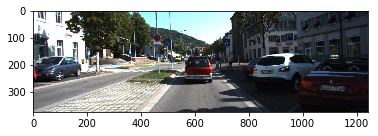

In [81]:
# Read a color image
img = cv2.imread("../img/code/000275.jpg")
#img = cv2.imread("../img/code/000276.jpg")
#img = cv2.imread("../img/code/000277.jpg")

rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
plt.imshow(rgb_img)

In [82]:
# Select a small fraction of pixels to plot by subsampling it
scale = max(img.shape[0], img.shape[1], 64) / 64  # at most 64 rows and columns
img_small = cv2.resize(img, (np.int(img.shape[1] / scale), np.int(img.shape[0] / scale)), interpolation=cv2.INTER_NEAREST)

In [83]:
# Convert subsampled image to desired color space(s)
img_small_RGB = cv2.cvtColor(img_small, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
img_small_HSV = cv2.cvtColor(img_small, cv2.COLOR_BGR2HSV)
img_small_rgb = img_small_RGB / 255.  # scaled to [0, 1], only for plotting



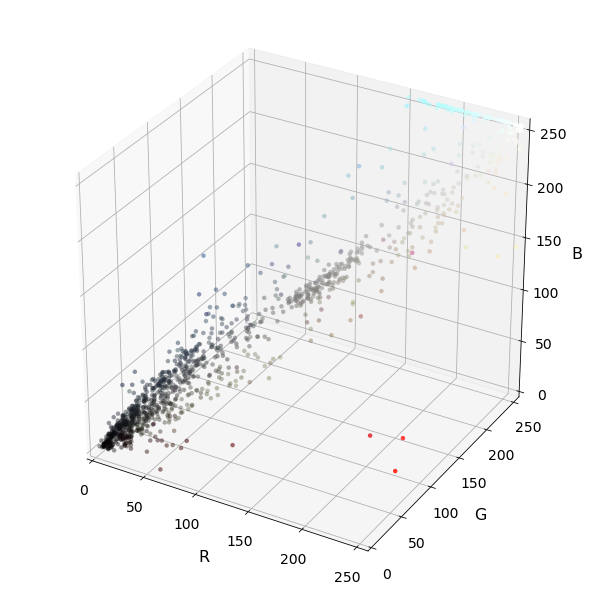

In [84]:
# Plot and show
plot3d(img_small_RGB, img_small_rgb)
plt.show()



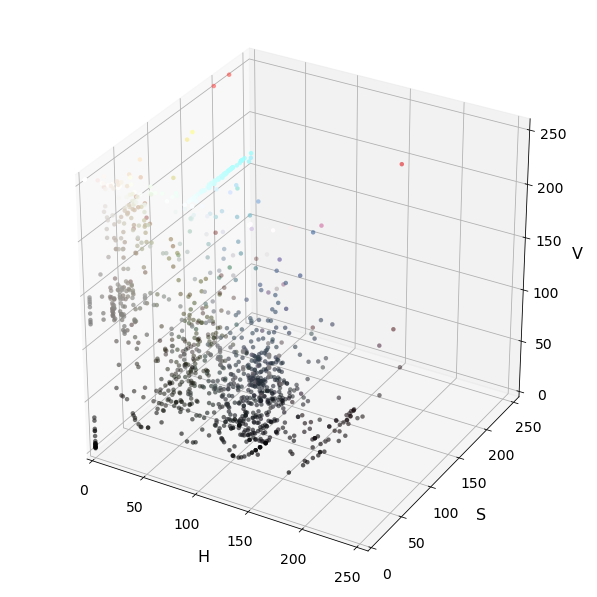

In [85]:
plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
plt.show()

As seen it is hard to distinguish between the class of pixels I am interested in (vehicles, in this case) from the background. So it may be more beneficial to plot pixels from vehicle and non-vehicle images separately. See if you can identify any trends using these samples:

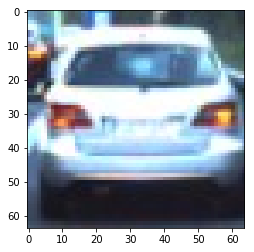

In [92]:
# Read a color image
#img = cv2.imread("../img/code/000278.jpg")
img = cv2.imread("../img/code/000279.jpg")
#img = cv2.imread("../img/code/000280.jpg")
#img = cv2.imread("../img/code/000281.jpg")


rgb_img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
plt.imshow(rgb_img)

In [96]:
# Convert subsampled image to desired color space(s)
img_small_RGB = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # OpenCV uses BGR, matplotlib likes RGB
img_small_HSV = cv2.cvtColor(img, cv2.COLOR_BGR2HSV)
img_small_LUV = cv2.cvtColor(img, cv2.COLOR_BGR2LUV)
img_small_LAB = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)

img_small_rgb = img / 255.  # scaled to [0, 1], only for plotting

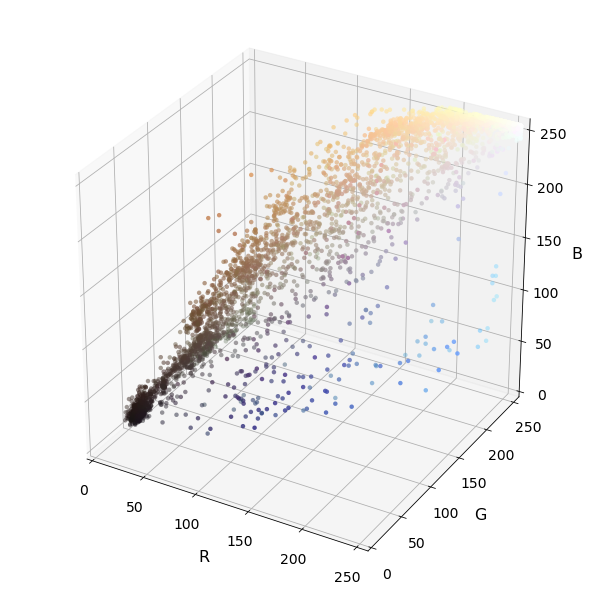

In [97]:
# Plot and show
plot3d(img_small_RGB, img_small_rgb)
plt.show()


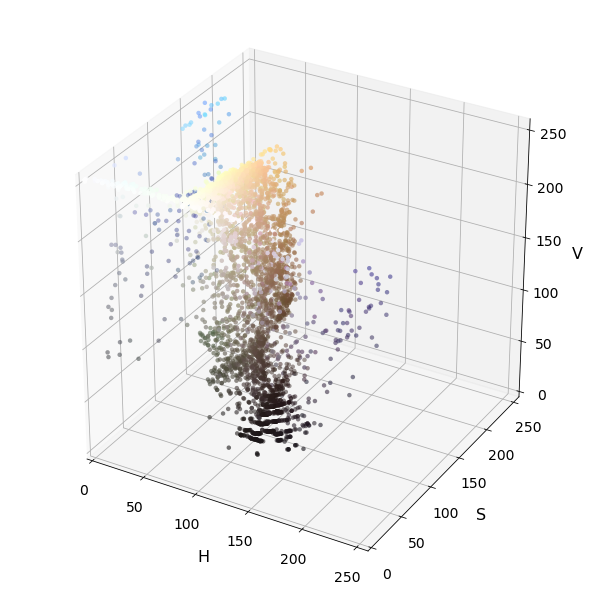

In [98]:
plot3d(img_small_HSV, img_small_rgb, axis_labels=list("HSV"))
plt.show()

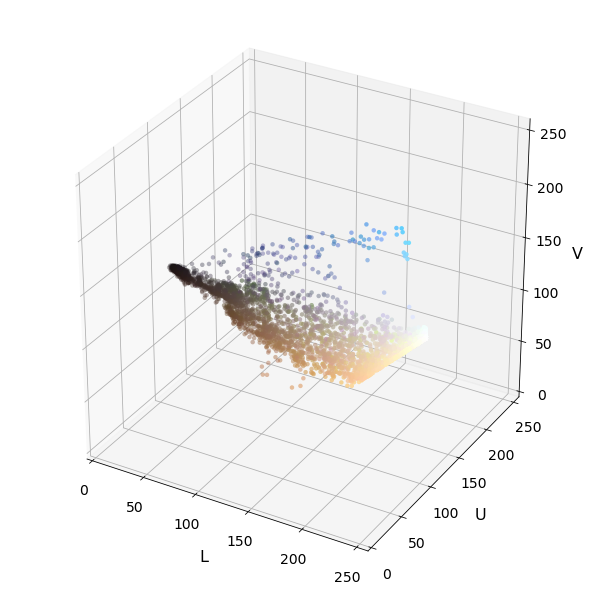

In [99]:
plot3d(img_small_LUV, img_small_rgb, axis_labels=list("LUV"))
plt.show()

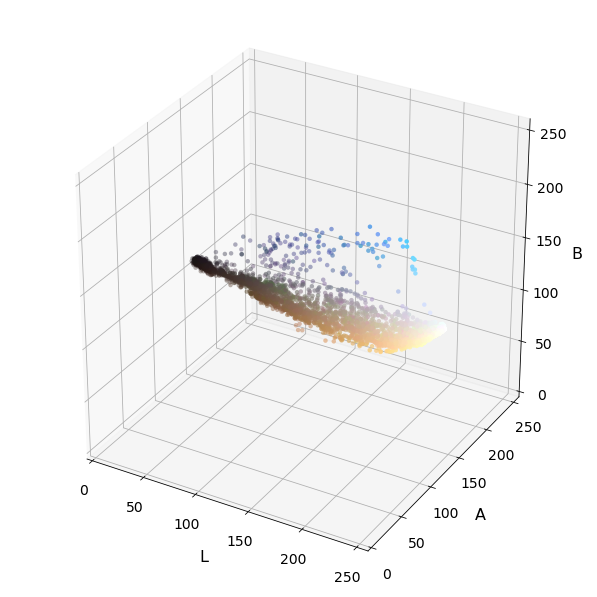

In [100]:
plot3d(img_small_LAB, img_small_rgb, axis_labels=list("LAB"))
plt.show()